In [ ]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import os
import re
from sklearn import model_selection, svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, average_precision_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, roc_auc_score

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import Conv1D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import MaxPooling1D
from keras.layers import Activation
from keras import optimizers
from keras.layers import Conv1D
from keras.optimizers import SGD #Stochastic Gradient Descent Optimizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding

from keras.applications import inception_v3

import livelossplot
from livelossplot import PlotLossesKeras
plot_losses = livelossplot.PlotLossesKeras()

In [ ]:
## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [3]:
# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.manifold import TSNE


# Data Extraction and Preparation

In [4]:
#Path to the Image Files
path_to_img = 'C:/Users/Nairomi/Desktop/Disaster/Data_Main/image/'
img_files=[pos_img for pos_img in os.listdir(path_to_img) if pos_img.endswith('.jpg')]
#Path To Text Files
#Path to the Image Files
path_to_text = 'C:/Users/Nairomi/Desktop/Disaster/Data_Main/text/'
text_files=[pos_text for pos_text in os.listdir(path_to_text) if pos_text.endswith('.txt')]

In [5]:
print(len(img_files))
print(len(text_files))

5879
5831


In [6]:
#Removing Extension From all the Names To A New List
name_files = [x[:-4] for x in img_files]
print(len(name_files))

5879


In [7]:
#Creating a Dataframe To Store Text Files and the Names of the Data
main_data=pd.DataFrame()
main_data['filename']=name_files

### Text Data

In [8]:
data_list=[]
for index in text_files:
    text_file=os.path.join(path_to_text,index)
    text_data=open(text_file,'r', encoding="utf8")
    data=text_data.read()
    data_list.append(data)

In [9]:
#Removing Extension From all the Names To A New List
name_files = [x[:-4] for x in text_files]
print(len(name_files))

5831


In [10]:
text_data=pd.DataFrame()
text_data['filename']=name_files
text_data['text_data']=data_list

In [11]:
main_data=pd.merge(main_data, text_data, on='filename', how='left')

In [12]:
main_data['img_path']=str(path_to_img)+main_data['filename']+str('.jpg')

In [13]:
main_data.head()

,filename,text_data,img_path
0,accrafloods_2015-06-04_22-22-16,#odorna #odornamarket #accrafloods #photograph...,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...
1,accrafloods_2015-06-04_22-54-13,One of the houses affected by the blast. #odor...,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...
2,accrafloods_2015-06-05_08-03-39,03/06/15 #NeverAgain #AccraFloods #PrayforGhana,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...
3,accrafloods_2015-06-05_08-08-35,Goil filling station on fire\n#hmm \n#accrafloods,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...
4,accrafloods_2015-06-05_12-22-10,@Regrann from @flavamatik: So my big sister se...,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...


### Label Neutralisation
The Dataset for the Label Neutralisation to 6 Classes has been derived From an External Replicatred Data Set without merging Stored in the E Drive

In [14]:
#Class 1 - damaged_infrastructure
path_to_img = 'E:/Lab Work and Codes/multimodal/damaged_infrastructure/images'
img_files_di=[pos_img for pos_img in os.listdir(path_to_img) if pos_img.endswith('.jpg')]
img_files_di = [x[:-4] for x in img_files_di]
print(len(img_files_di))

#Class 2 - damaged_nature
path_to_img = 'E:/Lab Work and Codes/multimodal/damaged_nature/images'
img_files_dn=[pos_img for pos_img in os.listdir(path_to_img) if pos_img.endswith('.jpg')]
img_files_dn = [x[:-4] for x in img_files_dn]
print(len(img_files_dn))

#Class 3 - fires
path_to_img = 'E:/Lab Work and Codes/multimodal/fires/images'
img_files_fires=[pos_img for pos_img in os.listdir(path_to_img) if pos_img.endswith('.jpg')]
img_files_fires = [x[:-4] for x in img_files_fires]
print(len(img_files_fires))      
      
#Class 4 - damaged_infrastructure
path_to_img = 'E:/Lab Work and Codes/multimodal/flood/images'
img_files_flood=[pos_img for pos_img in os.listdir(path_to_img) if pos_img.endswith('.jpg')]
img_files_flood = [x[:-4] for x in img_files_flood]
print(len(img_files_flood))       
      
#Class 1 - damaged_infrastructure
path_to_img = 'E:/Lab Work and Codes/multimodal/human_damage/images'
img_files_hd=[pos_img for pos_img in os.listdir(path_to_img) if pos_img.endswith('.jpg')]
img_files_hd = [x[:-4] for x in img_files_hd]
print(len(img_files_hd))       
      
#Class 1 - damaged_infrastructure
path_to_img = 'E:/Lab Work and Codes/multimodal/non_damage/images'
img_files_nd=[pos_img for pos_img in os.listdir(path_to_img) if pos_img.endswith('.jpg')]
img_files_nd = [x[:-4] for x in img_files_nd]
print(len(img_files_nd))  

1418
515
349
385
240
2972


In [15]:
def neutralisation_6(label):
    if(label in img_files_di):
        return 'damaged_infrastructure'
    elif(label in img_files_dn):
        return 'damaged_nature'
    elif(label in img_files_fires):
        return 'fires'
    elif(label in img_files_flood):
        return 'flood'
    elif(label in img_files_hd):
        return 'human_damage'
    elif(label in img_files_nd):
        return 'non_damage'
    else:
        return 'others'

In [16]:
main_data['labels']=main_data['filename'].apply(neutralisation_6)

In [17]:
main_data['labels'].value_counts()

non_damage                2972
damaged_infrastructure    1418
damaged_nature             515
flood                      385
fires                      349
human_damage               240
Name: labels, dtype: int64

In [18]:
main_data

,filename,text_data,img_path,labels
0,accrafloods_2015-06-04_22-22-16,#odorna #odornamarket #accrafloods #photograph...,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...,flood
1,accrafloods_2015-06-04_22-54-13,One of the houses affected by the blast. #odor...,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...,damaged_infrastructure
2,accrafloods_2015-06-05_08-03-39,03/06/15 #NeverAgain #AccraFloods #PrayforGhana,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...,damaged_infrastructure
3,accrafloods_2015-06-05_08-08-35,Goil filling station on fire\n#hmm \n#accrafloods,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...,fires
4,accrafloods_2015-06-05_12-22-10,@Regrann from @flavamatik: So my big sister se...,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...,human_damage
5,accrafloods_2015-06-05_13-38-16,"Dear brothers & sisters in Ghana, we may not a...",C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...,damaged_infrastructure
6,accrafloods_2015-06-05_22-14-59,#nikeplus #bridge #boxing #gym #accrafloods,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...,damaged_infrastructure
7,accrafloods_2015-06-06_05-51-55,Homes affected by the blast. #accrafloods phot...,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...,damaged_infrastructure
8,accrafloods_2015-06-06_15-01-32,"""An explosion sent flames raging in Ghana's ca...",C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...,flood
9,accrafloods_2015-06-06_16-59-56,"Hi my lovelies, check out My first hand exper...",C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...,flood


## Text Analysis

In [19]:
main_data['text_data']=main_data['text_data'].apply(str)

### 1.Data Cleaning

In [20]:
#Removing all the Numerical Data from a Text
from string import digits
def remove_num(text):
    remove_digits = str.maketrans('', '', digits)
    result=text.translate(remove_digits)
    return result

In [21]:
main_data['text_data']=main_data['text_data'].map(lambda x: remove_num(x))

In [22]:
def clean_text(text):    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    ## Stemming
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    
    return text

In [23]:
main_data['text_data']=main_data['text_data'].map(lambda x: clean_text(x))

In [24]:
#Function to Keep only the Alphabets
def keep_alpha(text):
    result=re.sub(r'[^A-Za-z  ]', '', text)
    return result
main_data['text_data']=main_data['text_data'].map(lambda x: keep_alpha(x))    

### Tokenizing and Create Sequence

In [25]:
vocabulary_size=20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(main_data['text_data'])
sequences = tokenizer.texts_to_sequences(main_data['text_data'])
data = pad_sequences(sequences, maxlen=50)

In [26]:
data.shape

(5879, 50)

### Training and Testing For Complete Dataset

This Part of the Split Will help us to Randomize the Complete Dataset and The Labels

In [27]:
def text_to_num(labe):
    arr=[]
    for i in range(len(labe)):
        if(labe[i]=='damaged_infrastructure'):
            arr.append(0)
        elif(labe[i]=='damaged_nature'):
            arr.append(1)
        elif(labe[i]=='fires'):
            arr.append(2)
        elif(labe[i]=='flood'):
            arr.append(3)
        elif(labe[i]=='human_damage'):
            arr.append(4)
        elif(labe[i]=='non_damage'):
            arr.append(5)
        else:
            arr.append(100)
    return arr

main_data['labels']=text_to_num(main_data['labels'])

In [28]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(data, main_data['labels'], test_size = 0.3, random_state =9, stratify=main_data['labels'])

In [29]:
train_labels=np.asarray(train_labels)
test_labels=np.asarray(test_labels)

train_labels=train_labels.reshape(-1,1)
test_labels=test_labels.reshape(-1,1)

In [32]:
#Converting the Labels to be Categorical
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
train_labels=enc.fit_transform(train_labels).toarray()
test_labels=enc.fit_transform(test_labels).toarray()

In [33]:
batch_size = 10
epochs = 100

In [34]:
model = Sequential()
model.add(Embedding(20000, 100, input_length=50))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           2000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 2,081,006
Trainable params: 2,081,006
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

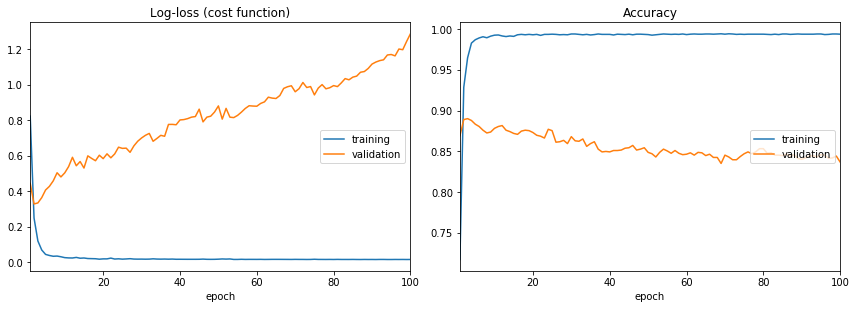

Log-loss (cost function):
training   (min:    0.015, max:    0.823, cur:    0.015)
validation (min:    0.328, max:    1.288, cur:    1.288)

Accuracy:
training   (min:    0.717, max:    0.994, cur:    0.994)
validation (min:    0.835, max:    0.890, cur:    0.837)


In [37]:
history=model.fit(train_features,train_labels,
                  batch_size=batch_size,
                  epochs=epochs, verbose=1, 
                  validation_data=(test_features, test_labels),
                  callbacks=[plot_losses])

In [38]:
test_labels

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [43]:
predictions=model.predict_classes(test_features)
test_labels=enc.inverse_transform(test_labels)
print(accuracy_score(test_labels, predictions))
print(confusion_matrix(test_labels, predictions))
print(classification_report(test_labels, predictions))

0.8367346938775511
[[337  21  16  16   9  26]
 [ 25 103   6   5   0  16]
 [ 12   1  88   3   0   1]
 [ 23  12   3  72   0   5]
 [  5   0   1   1  64   1]
 [ 43  21   6   8   2 812]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       425
           1       0.65      0.66      0.66       155
           2       0.73      0.84      0.78       105
           3       0.69      0.63      0.65       115
           4       0.85      0.89      0.87        72
           5       0.94      0.91      0.93       892

   micro avg       0.84      0.84      0.84      1764
   macro avg       0.77      0.79      0.78      1764
weighted avg       0.84      0.84      0.84      1764

